In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max()-x.min() ))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

C:\Anaconda3\envs\morti_os_suite\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

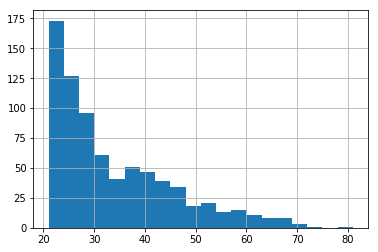

In [13]:
diabetes['Age'].hist(bins = 20)

In [14]:
age_buckets= tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [15]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [16]:
# Train Test Split

In [17]:
x_data = diabetes.drop('Class',axis=1)

In [18]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [19]:
labels = diabetes['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [22]:
# LEFT OF HERE FOR NEXT VIDEO - PART 2

In [24]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [25]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_master': '', '_save_checkpoints_secs': 600, '_task_type': 'worker', '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DA4B340828>, '_model_dir': 'C:\\Users\\dbarroso\\AppData\\Local\\Temp\\tmptkfaq0s5', '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_global_id_in_cluster': 0, '_num_worker_replicas': 1, '_evaluation_master': '', '_task_id': 0}


In [26]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\dbarroso\AppData\Local\Temp\tmptkfaq0s5\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.931472
INFO:tensorflow:global_step/sec: 161.928
INFO:tensorflow:step = 101, loss = 4.7296247 (0.611 sec)
INFO:tensorflow:global_step/sec: 237.603
INFO:tensorflow:step = 201, loss = 5.605817 (0.425 sec)
INFO:tensorflow:global_step/sec: 332.013
INFO:tensorflow:step = 301, loss = 6.1043444 (0.296 sec)
INFO:tensorflow:global_step/sec: 363.848
INFO:tensorflow:step = 401, loss = 4.570235 (0.283 sec)
INFO:tensorflow:global_step/sec: 225.315
INFO:tensorflow:step = 501, loss = 4.027074 (0.447 sec)
INFO:tensorflow:global_step/sec: 334.229
INFO:tensorflow:step = 601, loss = 7.1996775 (0.293 sec)
INFO:tensorflow:global_step/s

In [27]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [28]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-11-15:40:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\dbarroso\AppData\Local\Temp\tmptkfaq0s5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-11-15:40:51
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.802428, auc_precision_recall = 0.64418054, average_loss = 0.5260786, global_step = 1000, label/mean = 0.35064936, loss = 5.063506, prediction/mean = 0.37747443


In [29]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.802428,
 'auc_precision_recall': 0.64418054,
 'average_loss': 0.5260786,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.063506,
 'prediction/mean': 0.37747443}

In [30]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,
                                                     shuffle=False)

In [31]:
predictions = model.predict(pred_input_func)

In [32]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\dbarroso\AppData\Local\Temp\tmptkfaq0s5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [33]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.53190213], dtype=float32),
  'logits': array([0.12778199], dtype=float32),
  'probabilities': array([0.46809793, 0.53190213], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.64495385], dtype=float32),
  'logits': array([0.596931], dtype=float32),
  'probabilities': array([0.35504615, 0.64495385], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.38774544], dtype=float32),
  'logits': array([-0.4567991], dtype=float32),
  'probabilities': array([0.61225456, 0.38774544], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3516757], dtype=float32),
  'logits': array([-0.6116817], dtype=float32),
  'probabilities': array([0.6483243, 0.3516757], dtype=float32)},
 {'class_ids'

In [34]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_master': '', '_save_checkpoints_secs': 600, '_task_type': 'worker', '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DA505829E8>, '_model_dir': 'C:\\Users\\dbarroso\\AppData\\Local\\Temp\\tmp7o8p9cwd', '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_global_id_in_cluster': 0, '_num_worker_replicas': 1, '_evaluation_master': '', '_task_id': 0}


In [35]:
dnn_model.train(input_fn= input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [36]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [37]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree, age_buckets]

In [38]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [43]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_master': '', '_save_checkpoints_secs': 600, '_task_type': 'worker', '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DA4CCC4898>, '_model_dir': 'C:\\Users\\dbarroso\\AppData\\Local\\Temp\\tmphucw3pav', '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_global_id_in_cluster': 0, '_num_worker_replicas': 1, '_evaluation_master': '', '_task_id': 0}


In [44]:
dnn_model.train(input_fn= input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\dbarroso\AppData\Local\Temp\tmphucw3pav\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.8911495
INFO:tensorflow:global_step/sec: 187.415
INFO:tensorflow:step = 101, loss = 9.468103 (0.540 sec)
INFO:tensorflow:global_step/sec: 333.119
INFO:tensorflow:step = 201, loss = 4.7047615 (0.304 sec)
INFO:tensorflow:global_step/sec: 328.135
INFO:tensorflow:step = 301, loss = 4.558865 (0.304 sec)
INFO:tensorflow:global_step/sec: 330.918
INFO:tensorflow:step = 401, loss = 4.045431 (0.300 sec)
INFO:tensorflow:global_step/sec: 337.501
INFO:tensorflow:step = 501, loss = 3.340216 (0.294 sec)
INFO:tensorflow:global_step/sec: 351.818
INFO:tensorflow:step = 601, loss = 4.0768476 (0.284 sec)
INFO:tensorflow:global_step/s

In [45]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [46]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-11-15:52:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\dbarroso\AppData\Local\Temp\tmphucw3pav\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-11-15:52:09
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7748918, accuracy_baseline = 0.64935064, auc = 0.83345675, auc_precision_recall = 0.70683646, average_loss = 0.4804702, global_step = 1000, label/mean = 0.35064936, loss = 4.6245255, prediction/mean = 0.3351183


{'accuracy': 0.7748918,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83345675,
 'auc_precision_recall': 0.70683646,
 'average_loss': 0.4804702,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6245255,
 'prediction/mean': 0.3351183}